# Friday - Most crime day

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
#Loading San Francisco data
sf_data = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

#Unique days in the data
days = sf_data['DayOfWeek'].unique()

#Initialisation
sf_crime_count_per_day = np.zeros(np.count_nonzero(days))
sf_data_day_cate_num = {}
sf_data_day_cate_name = {}

#Counter
count = 0

#Calculating crimes on each day of the week
for dayName in days:
    sf_data_day = (sf_data.loc[sf_data['DayOfWeek'] == dayName])
    sf_crime_count_per_day[count] = sf_data_day['IncidntNum'].count()
    
    #Grouping crimes for each day by "Category"
    sf_data_day_cate = sf_data_day.groupby('Category')
    sf_data_day_cate_count = sf_data_day_cate.apply(lambda x: len(x))
    sf_data_day_cate_countF = sf_data_day_cate_count.to_frame(name='Crime')
    sf_data_day_cate_countF.sort(columns='Crime', ascending=False, inplace=True)
    sf_data_day_cate_num[dayName] = sf_data_day_cate_countF.values
    sf_data_day_cate_name[dayName] = sf_data_day_cate_countF.index.tolist()
    
    count += 1



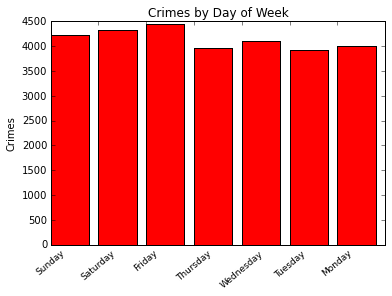

In [15]:
#Showing crimes per day of the week by bar plot
fig,ax = plt.subplots()
ax.bar(np.arange(count), sf_crime_count_per_day, color='r')
ax.set_ylabel('Crimes')
ax.set_title('Crimes by Day of Week')
ax.set_xticklabels(days,rotation=40)


####From above figure, it is clear that most crimes happen on Friday.
Thursday and Tuesday has least number of crimes.

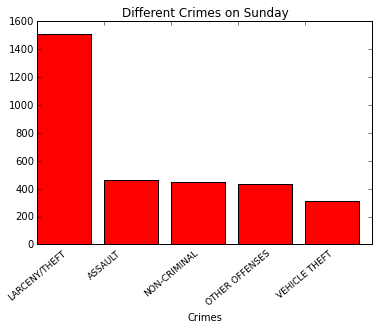

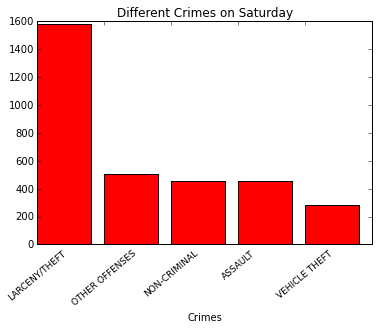

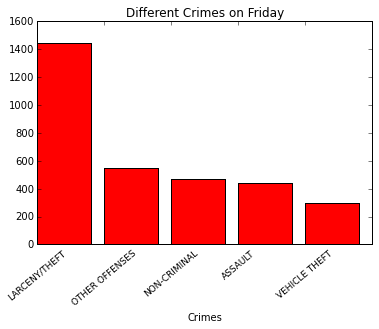

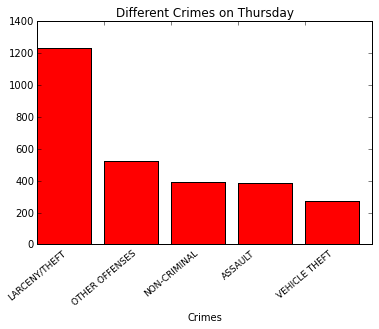

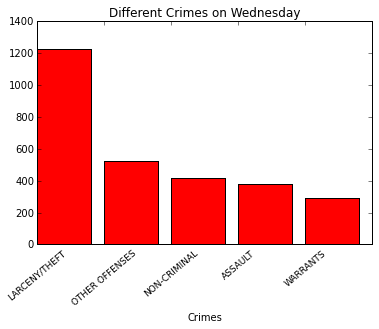

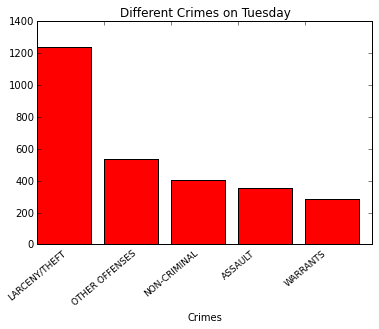

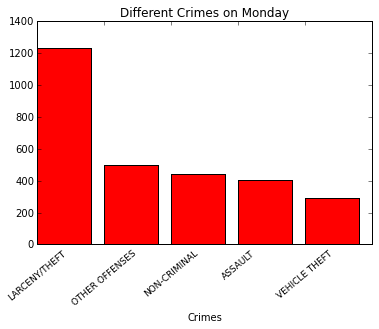

In [16]:
#Top 5 crimes for each day of the week in San Francisco
plt.rcParams['xtick.labelsize'] = 9

for dayName in days:
    fig, ax = plt.subplots()
    ax.bar(np.arange(len(sf_data_day_cate_name[dayName][:5])), sf_data_day_cate_num[dayName][:5], color='r')
    ax.set_xticklabels(sf_data_day_cate_name[dayName][:5],rotation=40)
    ax.set_xlabel('Crimes')
    ax.set_title('Different Crimes on %s' %dayName)


####Above 7 figures shows top 5 crimes for each day of the week.
Theft is the most common on each and every day of the week.
Although Friday has most number of crimes, most number of theft happens on Saturday.
Another interesting thing to notice is that all of the days has same crimes in the top 5 list except Wednesday & Tuesday. On Wednesday & Tuesday, more warrants are issued than vehicle theft.